In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x, y):
    return 2.5 * (x * x - y) * (x * x - y) + (1 - x) * (1 - x)

In [3]:
xb = xb0 = x0 = [-0.5, 1]
wo1 = np.array([1, 0])
wo2 = np.array([0, 1])
e = 0.5
beta = 0.5
n = 2
E = 0.01

In [4]:
def hook_jeeves(x0, xb, e, wo1, wo2, n, E, beta):
    i = 0
    path = [x0.copy()]

    while True:
        j = 1
        f0 = func(x0[0], x0[1])
        fb = func(xb[0], xb[1])

        x_next = x0 + e * wo1
        f = func((x_next[0]), x_next[1])

        if f < f0:
            f0 = f
        else:
            x_next = x_next - 2 * e * wo1
            f = func((x_next[0]), x_next[1])

            if f < f0:
                f0 = f
            else:
                x_next = x_next + e * wo1

        if j != n:
            j += 1

            x_next = x_next + e * wo2
            f = func((x_next[0]), x_next[1])

            if f < f0:
                f0 = f
            else:
                x_next = x_next - 2 * e * wo2
                f = func((x_next[0]), x_next[1])

                if f < f0:
                    f0 = f
                else:
                    x_next = x_next + e * wo2

            if fb > f0:
                xb0 = xb
                xb = x_next
                x0 = 2 * xb - xb0
                print(f"Etap roboczy: {x0}")
            elif e > E:
                e = beta * e
                x0 = xb

        path.append(x_next.copy())
        i += 1
        print(x_next)
        if e < E:
            return x_next[0], x_next[1], i, path

In [5]:
x, y, iterations, path = hook_jeeves(x0, xb, e, wo1, wo2, n, E, beta)
path = np.array(path)

print("x:", x)
print("y:", y)
print("Iteracje:", iterations)

Etap roboczy: [0.5 0. ]
[0.  0.5]
Etap roboczy: [ 1.  -0.5]
[0.5 0. ]
[0.5 0. ]
Etap roboczy: [0.5 0.5]
[0.5  0.25]
Etap roboczy: [1.   0.75]
[0.75 0.5 ]
[0.75 0.5 ]
[0.75 0.5 ]
Etap roboczy: [0.75  0.625]
[0.75   0.5625]
Etap roboczy: [0.875  0.8125]
[0.8125 0.6875]
Etap roboczy: [1.0625 1.0625]
[0.9375 0.875 ]
Etap roboczy: [1.0625 1.125 ]
[1. 1.]
[1.0625 1.125 ]
[1. 1.]
[1. 1.]
x: 1.0
y: 1.0
Iteracje: 14


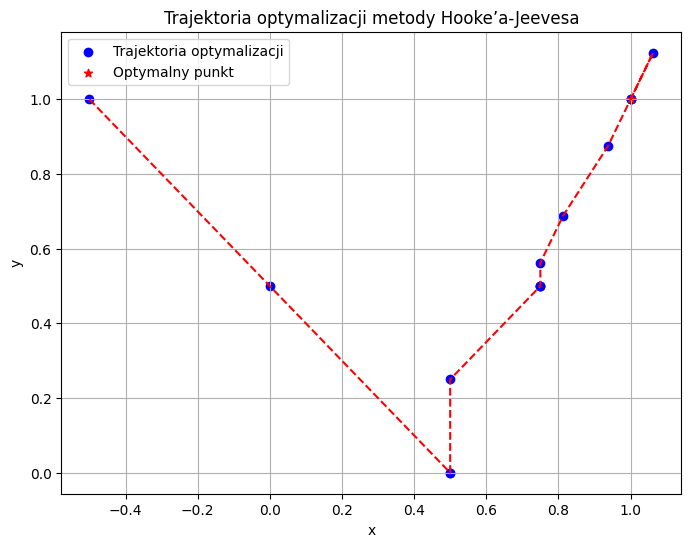

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(path[:, 0], path[:, 1], c='blue', label='Trajektoria optymalizacji')
plt.plot(path[:, 0], path[:, 1], 'r--')
plt.scatter([x], [y], c='red', marker='*', label='Optymalny punkt')
plt.title('Trajektoria optymalizacji metody Hooke’a-Jeevesa')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()